# HW-1

In [138]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**1. Сгенерируйте случайный массив в NumPy. Продемонстрируйте на нём различные операции, которые рассматривались на практике  
(можно взять и другие, тогда будет требование объяснить операцию)**


In [139]:
np.random.seed(32)
arr = np.random.randint(-10, 50, 20)
print(arr)

[13 33 -5 44 14  9 -3 15 -7 27 32 -1 -6  1  7 -7 -9 24 25 14]


In [140]:
arr.max()

np.int32(44)

In [141]:
arr.min()

np.int32(-9)

In [142]:
arr.mean()

np.float64(11.0)

In [143]:
arr.argmin()

np.int64(16)

In [144]:
arr.argmax()

np.int64(3)

In [145]:
arr.reshape(4, 5)

array([[13, 33, -5, 44, 14],
       [ 9, -3, 15, -7, 27],
       [32, -1, -6,  1,  7],
       [-7, -9, 24, 25, 14]], dtype=int32)

In [146]:
arr1, arr2 = np.split(arr, 2)
print(arr1.shape)
print(arr2.shape)

(10,)
(10,)


In [147]:
arr2.dot(arr1)

np.int32(1082)

In [148]:
arr3 = arr.reshape(5, 4)
print(arr3)

[[13 33 -5 44]
 [14  9 -3 15]
 [-7 27 32 -1]
 [-6  1  7 -7]
 [-9 24 25 14]]


In [149]:
arr3[4][3]

np.int32(14)

In [150]:
arr3[:,2].reshape(-1,1)

array([[-5],
       [-3],
       [32],
       [ 7],
       [25]], dtype=int32)

**2. Возьмите любое изображение из интернета, в котором присутствует хотя бы один объект. Воспользуйтесь функциями из OpenCV для выделения объекта-ов**

In [151]:
img = cv2.imread("pictures/picture2.jpg")
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


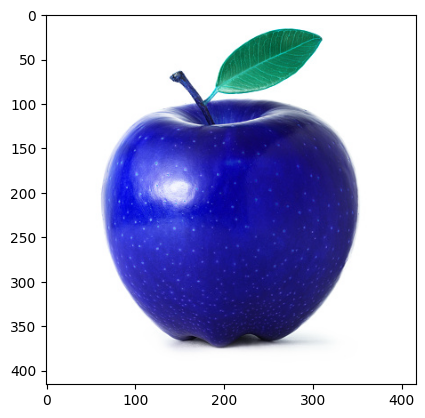

In [152]:
plt.imshow(img)

In [153]:
img_c = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


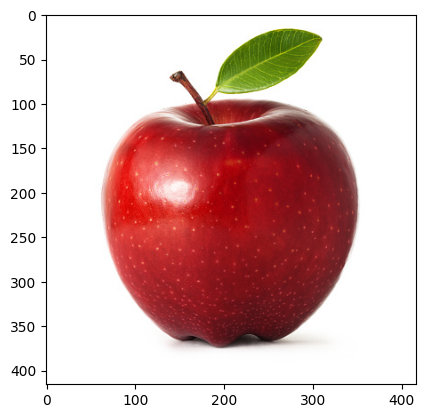

In [154]:
plt.imshow(img_c)

In [155]:
img_c.shape

(416, 416, 3)

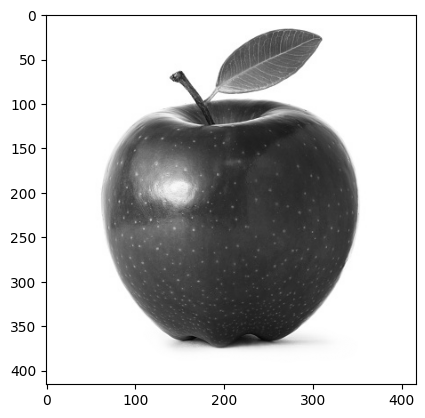

In [156]:
img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(img_gr, cmap='gray')

In [164]:
_, thresh = cv2.threshold(img_gr, 120, 255, cv2.THRESH_BINARY_INV)

In [158]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

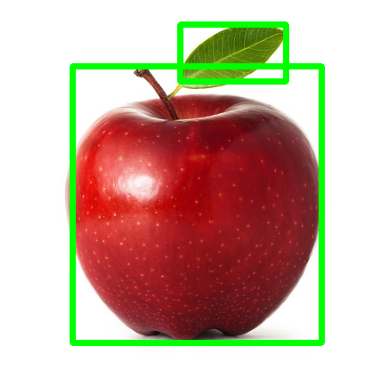

In [159]:
for cnt in contours:
    if cv2.contourArea(cnt) > 500:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')
plt.show()


**3. Воспроизведите функцию rectangle из OpenCV с нуля. Разрешено использовать только NumPy для разработки из сторонних библиотек (не обязательно, чтобы параметры были те же самые, как в OpenCV, например thickness. Главное, чтобы прямоугольник было видно на изображении). Продемонстрируйте работу вашей функции на тестовом изображении**

In [160]:
def my_rectangle(image, pt1, pt2, color, thickness=1): 
    res = image.copy()
    
    x1, y1 = int(pt1[0]), int(pt1[1])
    x2, y2 = int(pt2[0]), int(pt2[1])

    h, w = res.shape[:2]

    top_y_end = min(h, y1 + thickness)
    if top_y_end > y1:
        res[y1:top_y_end, x1:x2] = color
        
    bottom_y_start = max(0, y2 - thickness)
    if bottom_y_start < y2:
        res[bottom_y_start:y2, x1:x2] = color
        
    left_x_end = min(w, x1 + thickness)
    if left_x_end > x1:
        res[y1:y2, x1:left_x_end] = color

    right_x_start = max(0, x2 - thickness)
    if right_x_start < x2:
        res[y1:y2, right_x_start:x2] = color
    
    return res

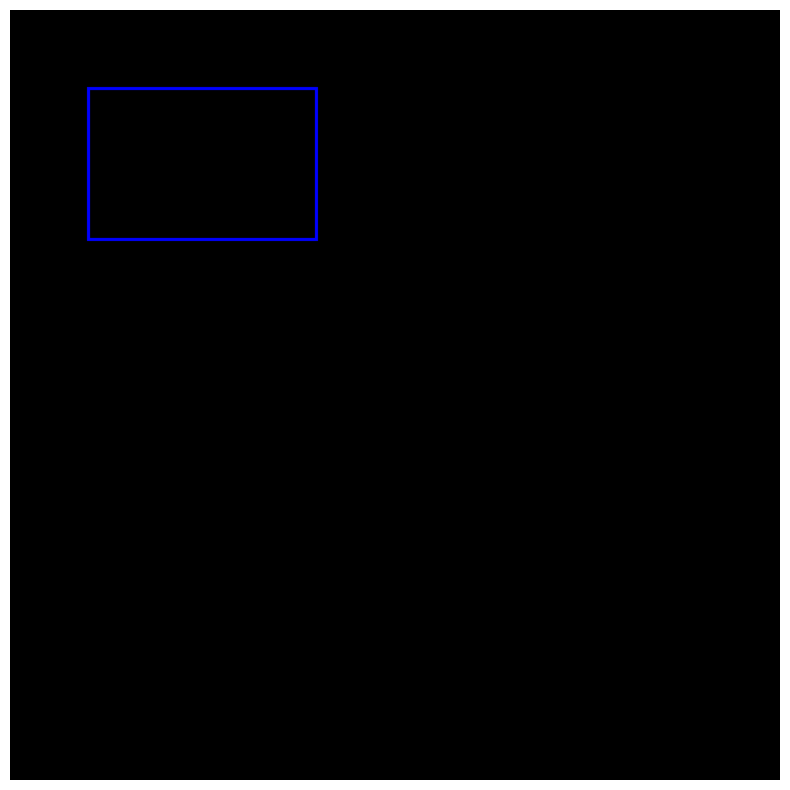

In [161]:
test_img = np.zeros((500, 500, 3), dtype=np.int16)

img_blue = my_rectangle(test_img, (50, 50), (200, 150), (0, 0, 255), thickness=2)
plt.figure(figsize=(10, 10))
plt.imshow(img_blue)
plt.axis('off')
plt.show()

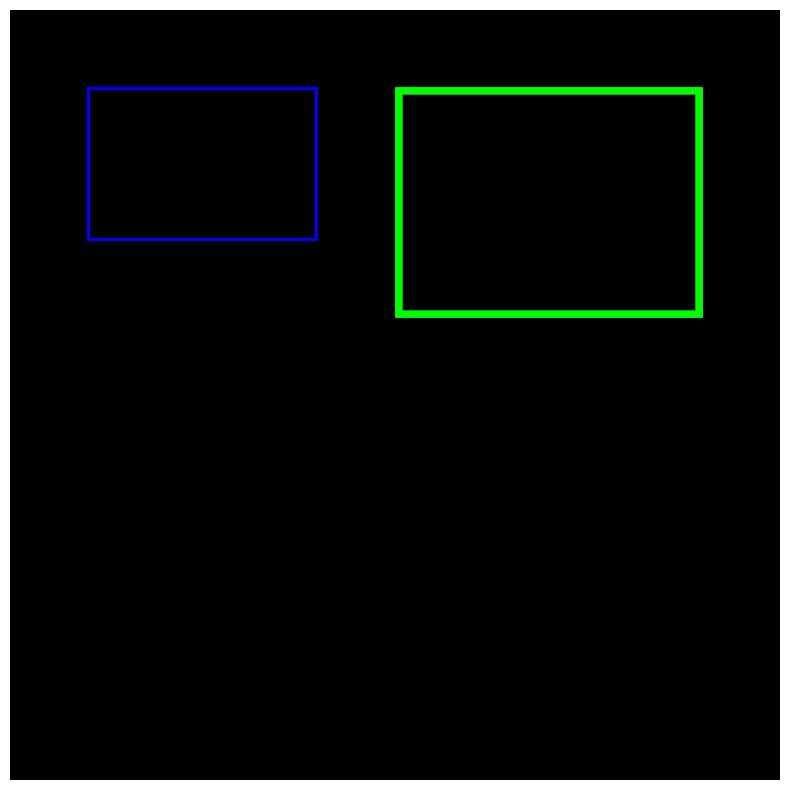

In [162]:
img_green = my_rectangle(img_blue, (250, 50), (450, 200), (0, 255, 0), thickness=5)
plt.figure(figsize=(10, 10))
plt.imshow(img_green)
plt.axis('off')
plt.show()

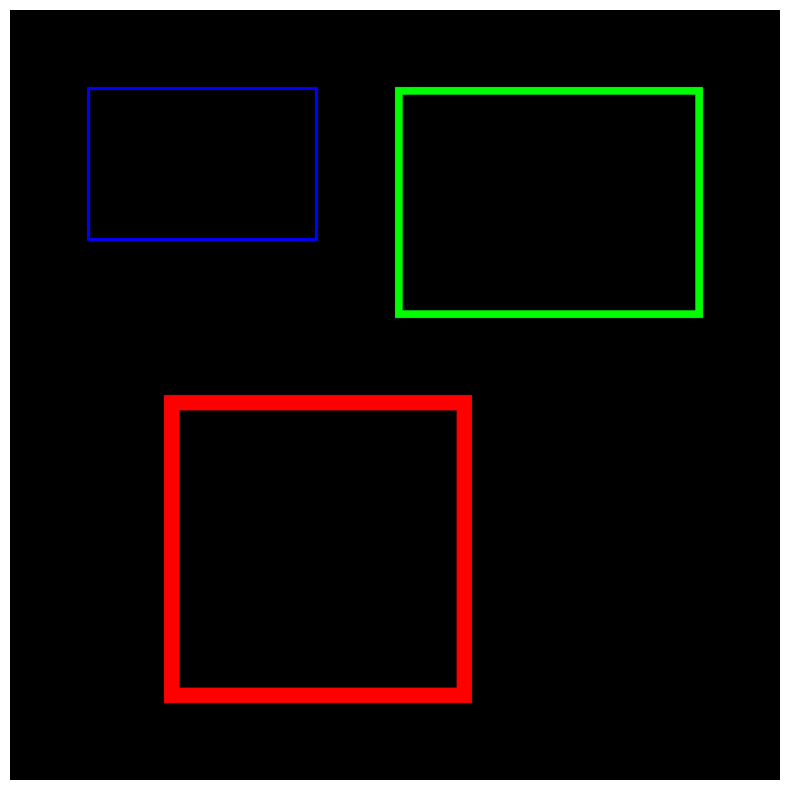

In [163]:
img_red = my_rectangle(img_green, (100, 250), (300, 450), (255, 0, 0), thickness=10)
plt.figure(figsize=(10, 10))
plt.imshow(img_red)
plt.axis('off')
plt.show()